In [10]:
from modules.graph_simulation import KineticRates, System, GraphSimulation
from modules.post_process import PostProcess
import matplotlib.pyplot as plt
import numpy as np

In [11]:
loads = [140, 56]
functionalities = [2, 5]
kinetic_rates = KineticRates(functionalities, preset="two_component_uniform")
output_folder = "/home/markjenei/polymerisation-graph-simulation/epoxy-hardener/dgeba-p5a/"
target_conversion = 0.9 # max. extent of reaction
for i in range(100):
    system = System(loads, kinetic_rates)
    sim = GraphSimulation(system, 'data', cycles_allowed=True)
    fsse_path = "./dgeba-p5a_fsse.data"
    conv_path = "./dgeba-p5a_conv.data"
    fsse_monomer_index = 1 # FSSE on monomer B := 1, see above
    sim.set_fsse_file_paths(fsse_monomer_index, fsse_path, conv_path)
    index = str(i).zfill(max(2, len(str(i))))
    save_file_loc = output_folder + "run_"+str(index)+".out"
    sim.run(target_conversion, save_file_loc)

100%|██████████| 252/252.0 [00:03<00:00, 65.19it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.03it/s]
100%|██████████| 252/252.0 [00:03<00:00, 63.65it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.23it/s]
100%|██████████| 252/252.0 [00:03<00:00, 65.23it/s]
100%|██████████| 252/252.0 [00:03<00:00, 65.96it/s]
100%|██████████| 252/252.0 [00:03<00:00, 65.87it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.22it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.15it/s]
100%|██████████| 252/252.0 [00:03<00:00, 67.64it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.36it/s]
100%|██████████| 252/252.0 [00:03<00:00, 65.71it/s]
100%|██████████| 252/252.0 [00:03<00:00, 65.88it/s]
100%|██████████| 252/252.0 [00:03<00:00, 63.87it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.43it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.45it/s]
100%|██████████| 252/252.0 [00:03<00:00, 64.22it/s]
100%|██████████| 252/252.0 [00:03<00:00, 65.80it/s]
100%|██████████| 252/252.0 [00:03<00:00, 67.18it/s]
100%|███████

....................................................................................................
gel point 0.5880478087649402


Text(0.5, 0, 'conversion')

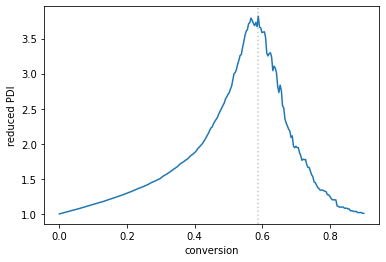

In [12]:
pp = PostProcess(loads, 'file', reactions_folder_path=output_folder, reaction_file_root='run_')
pp.average_sizes(reduced=True)
rpdi = pp.topology_data["dispersion_index"]
c = np.linspace(0, target_conversion, len(rpdi))
gel_point = c[np.nonzero(rpdi == max(rpdi))[0][0]]
print(f"gel point {gel_point}")
plt.axvline(gel_point, ls=':', color='xkcd:silver')
plt.plot(c, rpdi)
plt.ylabel("reduced PDI")
plt.xlabel("conversion")